## Análisis de datos - Clase 6

# Taller práctico - análisis de un dataset

En esta clase vamos a analizar en forma completa un dataset con datos de Fórmula 1 de la temporada 2024 (los datos fueron extraídos con la biblioteca Fastf1). El dataset contiene información sobre las carreras, los pilotos, los tiempos y los resultados de cada evento.


In [960]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [961]:
# Dataset de carreras del 2024
carreras_24 = pd.read_parquet('../datasets/carreras_24_after_eda.parquet', engine='pyarrow')

In [962]:
carreras_24.shape

(26606, 32)

In [963]:
carreras_24.columns

Index(['EventName', 'EventDate', 'Driver', 'DriverNumber', 'Team', 'PitInTime',
       'PitOutTime', 'IsPersonalBest', 'Stint', 'LapTime', 'LapNumber',
       'LapStartTime', 'LapStartDate', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'AirTemp',
       'TrackTemp', 'Humidity', 'Compound', 'TyreLife', 'FreshTyre',
       'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [964]:
carreras_24.head(10)

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,Humidity,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,Bahrain Grand Prix,2024-03-02,VER,1,Red Bull Racing,NaT,NaT,False,1.0,97.284,...,49.0,SOFT,4.0,False,12,1.0,False,NaN,False,False
1,Bahrain Grand Prix,2024-03-02,LEC,16,Ferrari,NaT,NaT,False,1.0,98.271,...,49.0,SOFT,4.0,False,12,2.0,False,NaN,False,False
2,Bahrain Grand Prix,2024-03-02,RUS,63,Mercedes,NaT,NaT,False,1.0,99.228,...,49.0,SOFT,4.0,False,12,3.0,False,NaN,False,False
3,Bahrain Grand Prix,2024-03-02,NOR,4,McLaren,NaT,NaT,False,1.0,102.168,...,49.0,SOFT,4.0,False,12,7.0,False,NaN,False,False
4,Bahrain Grand Prix,2024-03-02,HAM,44,Mercedes,NaT,NaT,False,1.0,103.122,...,49.0,SOFT,4.0,False,12,9.0,False,NaN,False,False
5,Bahrain Grand Prix,2024-03-02,PIA,81,McLaren,NaT,NaT,False,1.0,102.523,...,49.0,SOFT,4.0,False,12,8.0,False,NaN,False,False
6,Bahrain Grand Prix,2024-03-02,ALO,14,Aston Martin,NaT,NaT,False,1.0,101.679,...,49.0,SOFT,4.0,False,12,6.0,False,NaN,False,False
7,Bahrain Grand Prix,2024-03-02,SAR,2,Williams,NaT,NaT,False,1.0,105.921,...,49.0,SOFT,1.0,True,12,15.0,False,NaN,False,False
8,Bahrain Grand Prix,2024-03-02,SAI,55,Ferrari,NaT,NaT,False,1.0,100.620,...,49.0,SOFT,4.0,False,12,5.0,False,NaN,False,False
9,Bahrain Grand Prix,2024-03-02,ZHO,24,Kick Sauber,NaT,NaT,False,1.0,104.801,...,49.0,SOFT,1.0,True,12,13.0,False,NaN,False,False


In [965]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   EventName        26606 non-null  category       
 1   EventDate        26606 non-null  datetime64[ns] 
 2   Driver           26606 non-null  category       
 3   DriverNumber     26606 non-null  int64          
 4   Team             26606 non-null  category       
 5   PitInTime        849 non-null    timedelta64[ns]
 6   PitOutTime       840 non-null    timedelta64[ns]
 7   IsPersonalBest   26591 non-null  object         
 8   Stint            26606 non-null  float64        
 9   LapTime          26381 non-null  float64        
 10  LapNumber        26606 non-null  int64          
 11  LapStartTime     26606 non-null  float64        
 12  LapStartDate     26591 non-null  datetime64[ns] 
 13  Sector1Time      26066 non-null  float64        
 14  Sector2Time      26574

In [966]:
carreras_24.select_dtypes(include='bool').columns

Index(['FreshTyre', 'Deleted', 'FastF1Generated', 'IsAccurate'], dtype='object')

In [967]:
carreras_24.select_dtypes(include='object').columns

Index(['IsPersonalBest'], dtype='object')

In [968]:
# Convierto las booleanas
carreras_24['FreshTyre'] = carreras_24['FreshTyre'].astype('category')
carreras_24['IsPersonalBest'] = carreras_24['IsPersonalBest'].astype('category')
carreras_24['Deleted'] = carreras_24['Deleted'].astype('category')
carreras_24['TrackStatus'] = carreras_24['TrackStatus'].astype('category')
carreras_24['FastF1Generated'] = carreras_24['FastF1Generated'].astype('category')
carreras_24['IsAccurate'] = carreras_24['IsAccurate'].astype('category')


In [969]:
carreras_24.describe(include='category')

,EventName,Driver,Team,IsPersonalBest,Compound,FreshTyre,TrackStatus,Deleted,DeletedReason,FastF1Generated,IsAccurate
count,26606,26606,26606,26591,26606,26606,26606,26606,326,26606,26606
unique,24,24,10,2,6,2,25,2,255,2,2
top,Dutch Grand Prix,PIA,McLaren,False,HARD,True,1,False,TRACK LIMITS AT TURN 1 LAP 10,False,True
freq,1426,1444,2881,21094,13767,21042,24604,26280,5,26578,23557


### Datos por piloto y carrera

- Posición en cada carrera
- Total de tiempo de vuelta
- Compuesto de neumáticos usados
- Número de paradas y tiempo total de pits

In [ ]:
# Métricas por piloto y por carrera
result = carreras_24.groupby(['Driver', 'EventName'], observed=True).agg(
    Position_start=('Position', 'first'),
    Position_end=('Position', 'last'),
    Total_LapTime=('LapTime', 'sum'),
    Tyre_Compound_start=('Compound', 'first'),
    Tyre_Compound_end=('Compound', 'last'),
    Total_PitTime=('PitTime_seconds', 'sum'), # Total de tiempo en boxes
    Pit_Stops=('PitInTime', lambda x: x.notna().sum()),
).reset_index()

# Info de las entradas a boxes
pit_laps = (
    carreras_24[carreras_24['PitInTime'].notna()]
    .groupby(['Driver', 'EventName'], observed=True)['LapNumber']
    .apply(list)
    .reset_index()
    .rename(columns={'LapNumber': 'Pit_LapNumbers'})
)
result = result.merge(pit_laps, on=['Driver', 'EventName'], how='left')
result['Pit_LapNumbers'] = result['Pit_LapNumbers'].apply(lambda x: x if isinstance(x, list) else [])

result.head()

,Driver,EventName,Position_start,Position_end,Total_LapTime,Tyre_Compound_start,Tyre_Compound_end,Total_PitTime,Pit_Stops,Pit_LapNumbers
0,ALB,Abu Dhabi Grand Prix,16.0,11.0,5204.542,MEDIUM,HARD,22.054,1,[12]
1,ALB,Australian Grand Prix,14.0,11.0,4831.852,MEDIUM,HARD,35.187,2,"[6, 27]"
2,ALB,Austrian Grand Prix,15.0,14.0,5073.664,MEDIUM,HARD,43.397,2,"[12, 39]"
3,ALB,Azerbaijan Grand Prix,9.0,7.0,5665.403,HARD,MEDIUM,20.333,1,[31]
4,ALB,Bahrain Grand Prix,11.0,15.0,5516.628,SOFT,HARD,49.461,2,"[15, 36]"


### Otros datos y métricas de interés

- winners: ganadores de cada carrera
- ranking: cantidad de carreras ganadas por piloto
- ranking_top: el top 3 de pilotos ganadores
- df_top: todas las carreras de los pilotos del top 3
- ganadas: todas las carreras ganadas por los pilotos del top 3

In [ ]:
# Ganadores de cada carrera
winners = result[['Driver', 'EventName']][result['Position_end']==1].sort_values(['Driver', 'EventName'])

In [ ]:
# Top 3 ganadores
ranking = winners['Driver'].value_counts().reset_index()
ranking.columns = ['Driver', 'Wins']
# ranking = ranking.sort_values(by='Wins', ascending=False) # no es necesario, el value_counts() por defecto devuelve los datos ordenados.

ranking_top = ranking.head(3)
ranking_top

,Driver,Wins
0,VER,9
1,NOR,4
2,LEC,3


In [ ]:
# Me quedo solo con las carreras de los 3 pilotos que más carreras ganaron
df_top = result[result['Driver'].isin(ranking_top['Driver'])]
df_top.head()

,Driver,EventName,Position_start,Position_end,Total_LapTime,Tyre_Compound_start,Tyre_Compound_end,Total_PitTime,Pit_Stops,Pit_LapNumbers
157,LEC,Abu Dhabi Grand Prix,9.0,3.0,5225.219,MEDIUM,HARD,21.933,1,[20]
158,LEC,Australian Grand Prix,4.0,2.0,4829.209,MEDIUM,HARD,34.387,2,"[9, 34]"
159,LEC,Austrian Grand Prix,18.0,11.0,5129.854,MEDIUM,MEDIUM,96.589,4,"[1, 16, 33, 51]"
160,LEC,Azerbaijan Grand Prix,1.0,2.0,5588.917,MEDIUM,HARD,20.867,1,[16]
161,LEC,Bahrain Grand Prix,2.0,4.0,5544.411,SOFT,HARD,48.129,2,"[11, 34]"


In [ ]:
# Del top 3, solo las carreras donde cada piloto ganó

ganadas = df_top[df_top['Position_end'] == 1].copy()

ganadas['RacingTime'] = ganadas['Total_LapTime'] - ganadas['Total_PitTime']
ganadas['PitFraction'] = ganadas['Total_PitTime'] / ganadas['Total_LapTime']
ganadas['Position_Change'] = ganadas['Position_start'] - ganadas['Position_end']
ganadas['Compound_Strategy'] = ganadas['Tyre_Compound_start'].astype(str) + ' → ' + ganadas['Tyre_Compound_end'].astype(str)

ganadas['Driver'] = ganadas['Driver'].cat.remove_unused_categories()

ganadas.head()

,Driver,EventName,Position_start,Position_end,Total_LapTime,Tyre_Compound_start,Tyre_Compound_end,Total_PitTime,Pit_Stops,Pit_LapNumbers,RacingTime,PitFraction,Position_Change,Compound_Strategy
169,LEC,Italian Grand Prix,2.0,1.0,4480.727,MEDIUM,HARD,24.419,1,[15],4456.308,0.005450,1.0,MEDIUM → HARD
174,LEC,Monaco Grand Prix,1.0,1.0,8507.572,MEDIUM,HARD,2357.749,1,[1],6149.823,0.277135,0.0,MEDIUM → HARD
180,LEC,United States Grand Prix,1.0,1.0,5709.639,MEDIUM,HARD,23.870,1,[26],5685.769,0.004181,0.0,MEDIUM → HARD
202,NOR,Abu Dhabi Grand Prix,1.0,1.0,5193.291,MEDIUM,HARD,21.406,1,[26],5171.885,0.004122,0.0,MEDIUM → HARD
211,NOR,Dutch Grand Prix,2.0,1.0,5445.519,MEDIUM,HARD,21.520,1,[28],5423.999,0.003952,1.0,MEDIUM → HARD


### Más visualizaciones

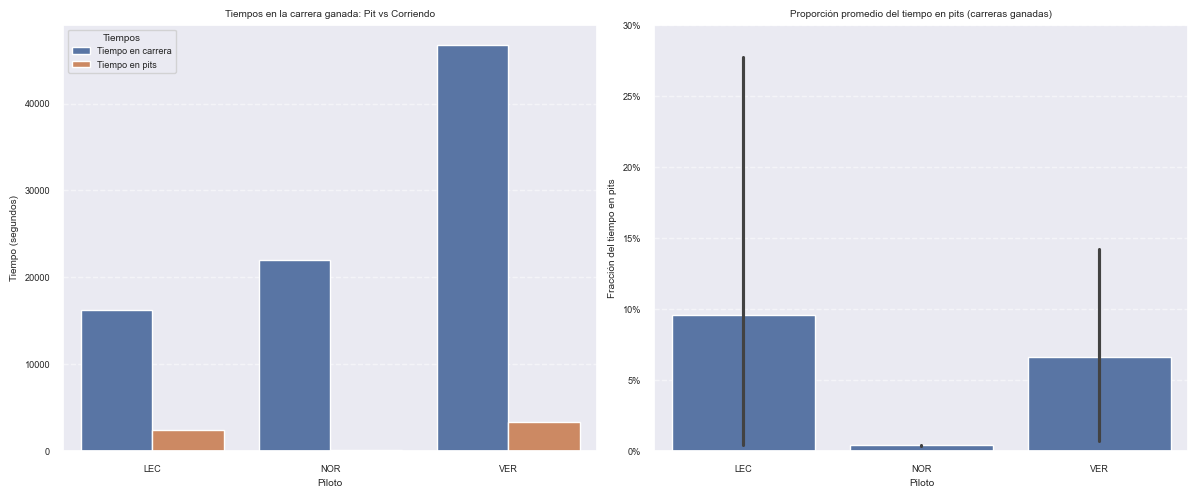

In [ ]:
# Preparamos los datos
comparacion = ganadas.melt(
    id_vars=['Driver', 'EventName', 'Pit_Stops'],
    value_vars=['RacingTime', 'Total_PitTime'],
    var_name='Tipo',
    value_name='Tiempo'
)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primer gráfico: Barras de tiempo total
sns.barplot(data=comparacion, errorbar=None, estimator='sum', x='Driver', y='Tiempo', hue='Tipo', ax=axes[0])
axes[0].set_title('Tiempos en la carrera ganada: Pit vs Corriendo')
axes[0].set_ylabel('Tiempo (segundos)')
axes[0].set_xlabel('Piloto')
axes[0].legend(title='Tiempos', labels=['Tiempo en carrera', 'Tiempo en pits'])
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Segundo gráfico: Fracción de tiempo en boxes
sns.barplot(data=ganadas, x='Driver', y='PitFraction', estimator='mean', ax=axes[1])
axes[1].set_title('Proporción promedio del tiempo en pits (carreras ganadas)')
axes[1].set_ylabel('Fracción del tiempo en boxes')
axes[1].set_xlabel('Piloto')
axes[1].set_ylim(0, 0.3)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


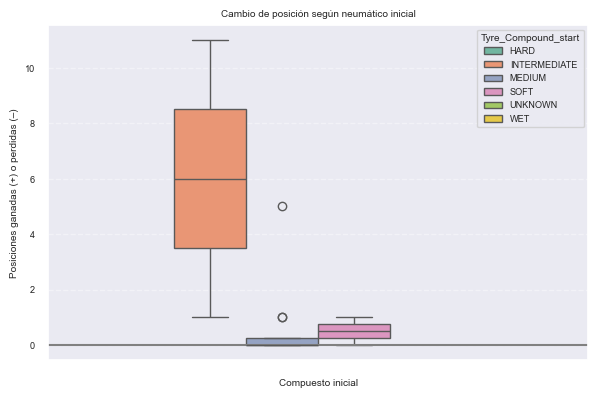

In [ ]:
ganadas['Position_Change'] = ganadas['Position_start'] - ganadas['Position_end']

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=ganadas,
    hue='Tyre_Compound_start',
    y='Position_Change',
    palette='Set2'
)
plt.axhline(0, linestyle='-', color='gray')
plt.title('Cambio de posición según neumático inicial')
plt.ylabel('Posiciones ganadas (+) o perdidas (–)')
plt.xlabel('Compuesto inicial')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


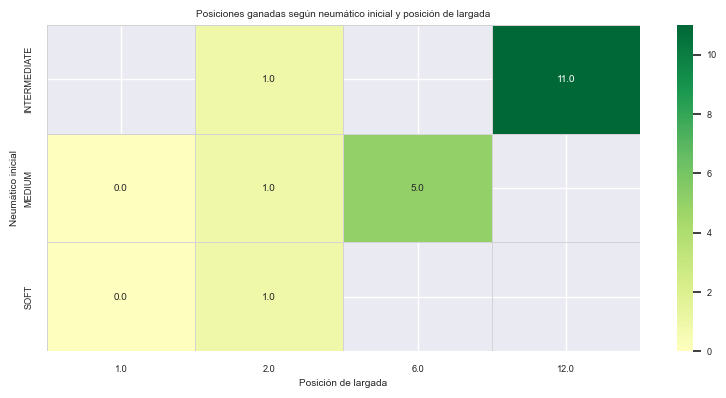

In [ ]:
# Pivot con posición de largada
pivot = ganadas.pivot_table(
    index='Tyre_Compound_start',
    columns='Position_start',
    values='Position_Change',
    aggfunc='mean',
    observed=False
)

# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="RdYlGn", center=0, linewidths=0.5, linecolor='lightgray')

plt.title("Posiciones ganadas según neumático inicial y posición de largada")
plt.xlabel("Posición de largada")
plt.ylabel("Neumático inicial")
plt.tight_layout()
plt.show()


---
### Exportación para leer en otra Notebook

In [ ]:
import json

# Detectar columnas categóricas
categorical_cols = [col for col, dtype in carreras_24.dtypes.items() if str(dtype) == 'category']

# Guardar los tipos como strings
dtypes_str = {col: str(dtype) for col, dtype in carreras_24.dtypes.items()}

# Guardar todo en un solo JSON
info = {
    "dtypes": dtypes_str,
    "categoricals": categorical_cols
}

with open("../datasets/carreras_24_dtypes.json", "w") as f:
    json.dump(info, f)

# exportar CSV
carreras_24.to_csv('../datasets/carreras_24.csv', index=False)
